<a href="https://colab.research.google.com/github/cebisilerhmchunu-max/Data-analysis/blob/main/Android_App_Market_on_Google_Play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

# Load apps dataset
apps = pd.read_csv('/content/apps.csv', engine='python', on_bad_lines='skip')
print("Apps dataset shape:", apps.shape)
print(apps.head())

# Load user reviews dataset
reviews = pd.read_csv('/content/user_reviews.csv', engine='python', on_bad_lines='skip')
print("Reviews dataset shape:", reviews.shape)
print(reviews.head())


Apps dataset shape: (11007, 14)
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyo

In [16]:
import pandas as pd

# Load dataset
apps = pd.read_csv('/content/apps.csv', engine='python', on_bad_lines='skip')

# Remove duplicates
apps.drop_duplicates(subset='App', inplace=True)

# Clean and convert Rating and Reviews
apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')
apps['Reviews'] = pd.to_numeric(apps['Reviews'], errors='coerce')

# Clean Installs
apps['Installs'] = apps['Installs'].astype(str)
apps['Installs'] = apps['Installs'].str.replace('+','', regex=False)
apps['Installs'] = apps['Installs'].str.replace(',','', regex=False)
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')

# Clean Price
apps['Price'] = apps['Price'].astype(str)
apps['Price'] = apps['Price'].str.replace('$','', regex=False)
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')

# Clean Size
apps['Size'] = apps['Size'].replace('Varies with device', pd.NA)
apps['Size'] = apps['Size'].astype(str)
apps['Size'] = apps['Size'].str.replace('M','', regex=False)
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')  # size in MB

# Convert Last Updated to datetime
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'], errors='coerce')

# Clean text columns
apps['App'] = apps['App'].str.strip()
apps['Category'] = apps['Category'].str.strip()
apps['Content Rating'] = apps['Content Rating'].str.strip()
apps['Genres'] = apps['Genres'].str.strip()
apps['Current Ver'] = apps['Current Ver'].str.strip()
apps['Android Ver'] = apps['Android Ver'].str.strip()

# Save cleaned dataset
apps.to_csv('apps_clean.csv', index=False)

# Quick check
print("Cleaned Apps dataset shape:", apps.shape)
apps.head()


Cleaned Apps dataset shape: (9659, 14)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [17]:
import pandas as pd

# Load dataset
reviews = pd.read_csv('/content/user_reviews.csv', engine='python', on_bad_lines='skip')

# Drop rows with missing reviews
reviews = reviews.dropna(subset=['Translated_Review'])

# Drop duplicates
reviews.drop_duplicates(subset=['App', 'Translated_Review'], inplace=True)

# Clean text columns
reviews['App'] = reviews['App'].str.strip()
reviews['Translated_Review'] = reviews['Translated_Review'].str.strip()
reviews['Sentiment'] = reviews['Sentiment'].str.strip()

# Convert Sentiment Polarity and Subjectivity to numeric
reviews['Sentiment_Polarity'] = pd.to_numeric(reviews['Sentiment_Polarity'], errors='coerce')
reviews['Sentiment_Subjectivity'] = pd.to_numeric(reviews['Sentiment_Subjectivity'], errors='coerce')

# Save cleaned dataset
reviews.to_csv('reviews_clean.csv', index=False)

# Quick check
print("Cleaned Reviews dataset shape:", reviews.shape)
reviews.head()


Cleaned Reviews dataset shape: (29692, 5)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [18]:
import pandas as pd

# Load cleaned datasets
apps = pd.read_csv('apps_clean.csv')
reviews = pd.read_csv('reviews_clean.csv')

# Merge on App name
merged = pd.merge(reviews, apps, on='App', how='inner')

# Quick check
print("Merged dataset shape:", merged.shape)
merged.head()


Merged dataset shape: (28250, 18)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Unnamed: 0,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,1393,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,1393,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,1393,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,1393,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,1393,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up


In [19]:
merged.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False)


,Sentiment_Polarity
Category,
COMICS,0.449810
EVENTS,0.375086
AUTO_AND_VEHICLES,0.343119
PARENTING,0.313316
EDUCATION,0.297454
HEALTH_AND_FITNESS,0.294396
WEATHER,0.281344
FOOD_AND_DRINK,0.279847
PERSONALIZATION,0.274741


Apps per category:
 Category
GAME                   4344
FAMILY                 1802
HEALTH_AND_FITNESS     1621
TOOLS                  1398
FINANCE                1336
TRAVEL_AND_LOCAL       1331
SPORTS                 1216
MEDICAL                1156
PRODUCTIVITY           1135
DATING                 1087
PERSONALIZATION         961
PHOTOGRAPHY             906
COMMUNICATION           855
LIFESTYLE               834
ENTERTAINMENT           827
NEWS_AND_MAGAZINES      733
SOCIAL                  661
BUSINESS                657
SHOPPING                649
EDUCATION               644
BOOKS_AND_REFERENCE     617
FOOD_AND_DRINK          583
HOUSE_AND_HOME          445
ART_AND_DESIGN          354
LIBRARIES_AND_DEMO      332
VIDEO_PLAYERS           326
BEAUTY                  317
AUTO_AND_VEHICLES       283
PARENTING               256
WEATHER                 194
MAPS_AND_NAVIGATION     189
EVENTS                  156
COMICS                   45
Name: count, dtype: int64


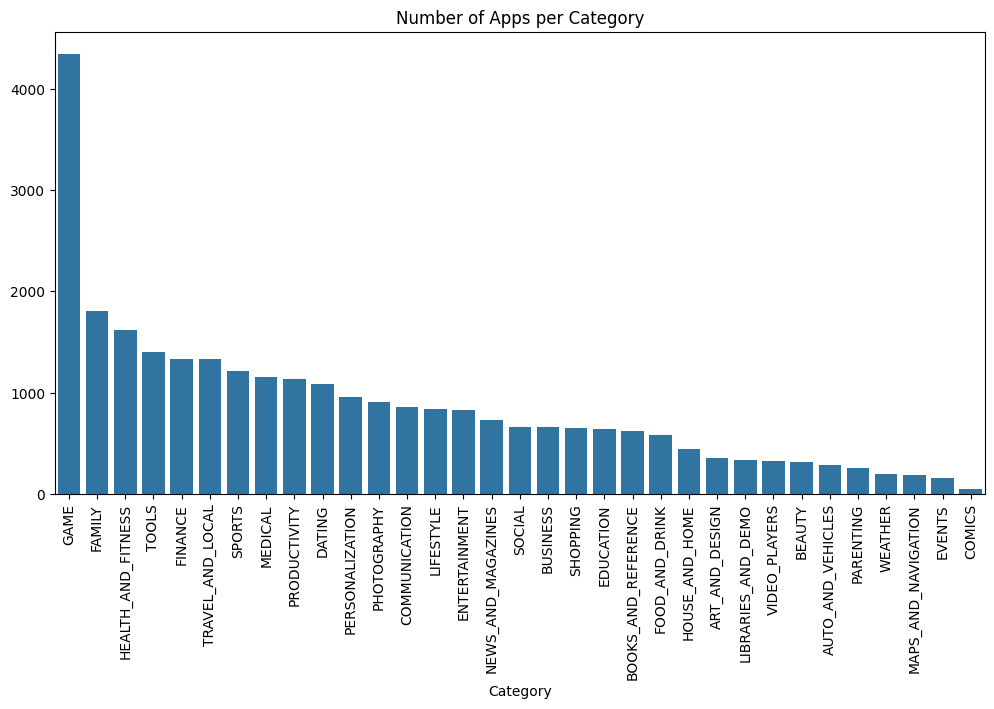

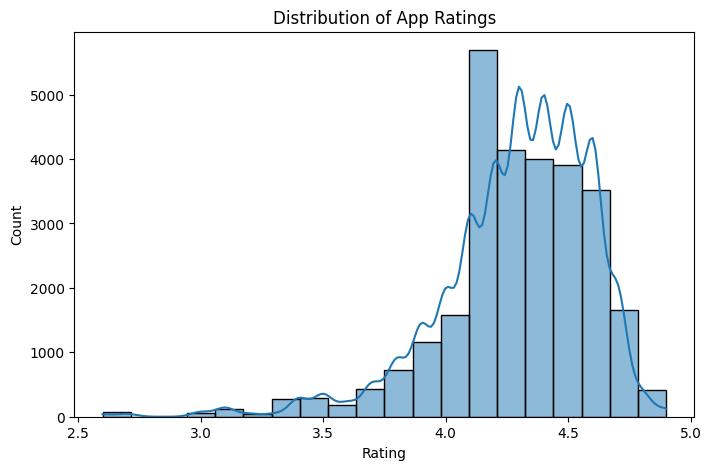

Rating skew: -1.2923963405396417
Rating describe:
 count    28250.000000
mean         4.290577
std          0.309401
min          2.600000
25%          4.100000
50%          4.300000
75%          4.500000
max          4.900000
Name: Rating, dtype: float64
Correlation matrix:
           Installs    Rating     Price      Size
Installs  1.000000  0.026489 -0.020184  0.205384
Rating    0.026489  1.000000 -0.013222  0.136859
Price    -0.020184 -0.013222  1.000000 -0.018436
Size      0.205384  0.136859 -0.018436  1.000000


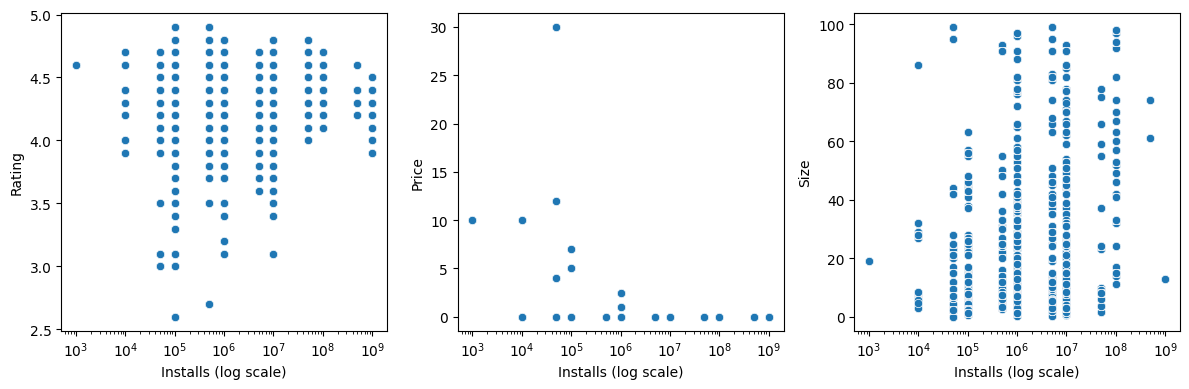

Top 10 Free Apps by Installs:
             App    Installs  Rating
18503  Facebook  1000000000     4.1
18504  Facebook  1000000000     4.1
18505  Facebook  1000000000     4.1
18506  Facebook  1000000000     4.1
26259  Hangouts  1000000000     4.0
26260  Hangouts  1000000000     4.0
26261  Hangouts  1000000000     4.0
26262  Hangouts  1000000000     4.0
26263  Hangouts  1000000000     4.0
26264  Hangouts  1000000000     4.0
Top 10 Paid Apps by Installs:
               App  Installs  Rating
25562  HD Widgets   1000000     4.3
25561  HD Widgets   1000000     4.3
25560  HD Widgets   1000000     4.3
25559  HD Widgets   1000000     4.3
25558  HD Widgets   1000000     4.3
25557  HD Widgets   1000000     4.3
25556  HD Widgets   1000000     4.3
25555  HD Widgets   1000000     4.3
25539  HD Widgets   1000000     4.3
25538  HD Widgets   1000000     4.3


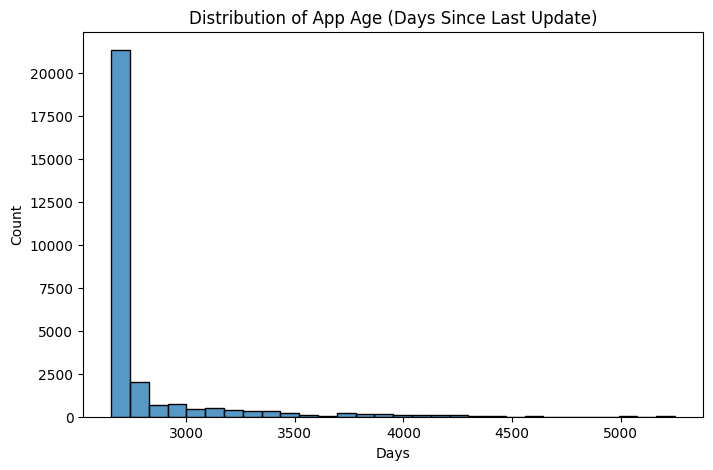

Average app age by category:
 Category
AUTO_AND_VEHICLES      2675.597173
SHOPPING               2677.488444
FINANCE                2682.678892
BUSINESS               2684.060883
PARENTING              2691.679688
EVENTS                 2710.647436
ENTERTAINMENT          2712.120919
FOOD_AND_DRINK         2712.766724
COMICS                 2714.555556
MAPS_AND_NAVIGATION    2719.164021
TRAVEL_AND_LOCAL       2719.850488
GAME                   2722.935543
DATING                 2728.057958
NEWS_AND_MAGAZINES     2746.061392
PHOTOGRAPHY            2767.956954
BOOKS_AND_REFERENCE    2770.897893
BEAUTY                 2779.230284
SPORTS                 2790.908717
COMMUNICATION          2793.112281
FAMILY                 2796.881243
WEATHER                2803.329897
HOUSE_AND_HOME         2804.579775
ART_AND_DESIGN         2831.584746
HEALTH_AND_FITNESS     2841.206046
PRODUCTIVITY           2841.725991
MEDICAL                2846.772491
LIFESTYLE              2855.443645
TOOLS           

In [22]:
# merged = pd.merge(reviews, apps, on='App', how='inner')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -----------------------------
# 1. Count apps per category
# -----------------------------
category_counts = merged['Category'].value_counts()
print("Apps per category:\n", category_counts)

plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Apps per Category')
plt.show()

# -----------------------------
# 2. Distribution of ratings
# -----------------------------
plt.figure(figsize=(8,5))
sns.histplot(merged['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.show()

print("Rating skew:", merged['Rating'].skew())
print("Rating describe:\n", merged['Rating'].describe())

# -----------------------------
# 3. Correlation: Installs vs Rating, Price, Size
# -----------------------------
corr_cols = ['Installs', 'Rating', 'Price', 'Size']
print("Correlation matrix:\n", merged[corr_cols].corr())

plt.figure(figsize=(12,4))
for i, col in enumerate(['Rating', 'Price', 'Size']):
    plt.subplot(1,3,i+1)
    sns.scatterplot(x=merged['Installs'], y=merged[col])
    plt.xscale('log')
    plt.xlabel('Installs (log scale)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# -----------------------------
# 4. Top free vs paid apps by installs and ratings
# -----------------------------
top_free = merged[merged['Type']=='Free'].sort_values('Installs', ascending=False).head(10)
top_paid = merged[merged['Type']=='Paid'].sort_values('Installs', ascending=False).head(10)
print("Top 10 Free Apps by Installs:\n", top_free[['App','Installs','Rating']])
print("Top 10 Paid Apps by Installs:\n", top_paid[['App','Installs','Rating']])

# -----------------------------
# 5. Growth signals from Last Updated and Age
# -----------------------------
merged['Last Updated'] = pd.to_datetime(merged['Last Updated'], errors='coerce')
merged['age_days'] = (pd.Timestamp('today') - merged['Last Updated']).dt.days

plt.figure(figsize=(8,5))
sns.histplot(merged['age_days'].dropna(), bins=30)
plt.title('Distribution of App Age (Days Since Last Update)')
plt.xlabel('Days')
plt.show()

avg_age_category = merged.groupby('Category')['age_days'].mean().sort_values()
print("Average app age by category:\n", avg_age_category)


Average sentiment polarity by category:
 Category
COMICS                 0.449810
EVENTS                 0.375086
AUTO_AND_VEHICLES      0.343119
PARENTING              0.313316
EDUCATION              0.297454
HEALTH_AND_FITNESS     0.294396
WEATHER                0.281344
FOOD_AND_DRINK         0.279847
PERSONALIZATION        0.274741
MAPS_AND_NAVIGATION    0.259767
BOOKS_AND_REFERENCE    0.258982
LIBRARIES_AND_DEMO     0.239990
ART_AND_DESIGN         0.233363
MEDICAL                0.226539
HOUSE_AND_HOME         0.224876
PHOTOGRAPHY            0.224834
LIFESTYLE              0.224727
TOOLS                  0.213829
TRAVEL_AND_LOCAL       0.212001
SHOPPING               0.202583
BEAUTY                 0.199734
BUSINESS               0.199730
SPORTS                 0.195027
PRODUCTIVITY           0.194531
DATING                 0.179436
FINANCE                0.171977
COMMUNICATION          0.171862
NEWS_AND_MAGAZINES     0.152946
VIDEO_PLAYERS          0.136103
ENTERTAINMENT         

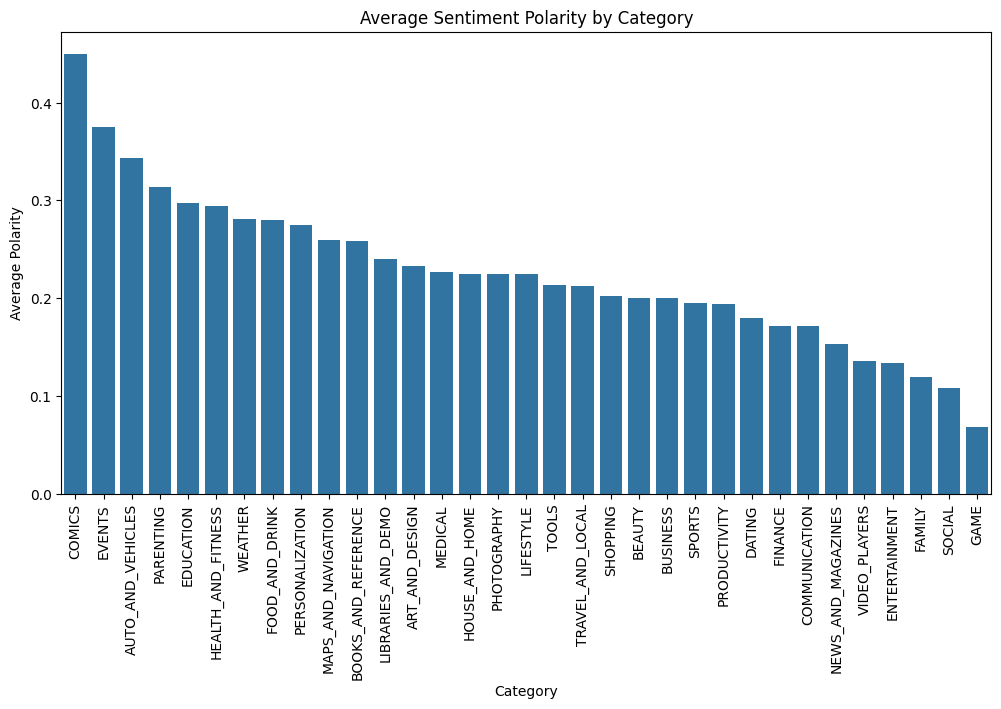

Average sentiment polarity by rating bin:
 Rating_Bin
0-2         NaN
2-3   -0.057543
3-4    0.127577
4-5    0.202168
Name: Sentiment_Polarity, dtype: float64


/tmp/ipython-input-2067164510.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_rating = merged.groupby('Rating_Bin')['Sentiment_Polarity'].mean()


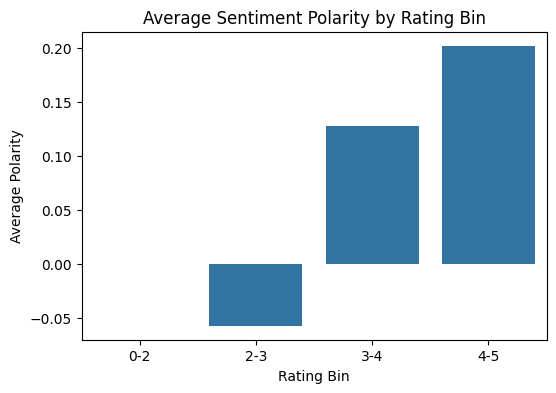

Top 10 apps by average positive sentiment:
 App
HomeWork                                              1.000000
Google Slides                                         0.933333
Daily Workouts - Exercise Fitness Routine Trainer     0.800000
Bed Time Fan - White Noise Sleep Sounds               0.781250
Cameringo Lite. Filters Camera                        0.770269
Google Primer                                         0.750000
GPS Map Free                                          0.700000
GPS Speedometer and Odometer                          0.650000
Best Ovulation Tracker Fertility Calendar App Glow    0.595313
3D Live Neon Weed Launcher                            0.568182
Name: Sentiment_Polarity, dtype: float64


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# merged dataset is already loaded and cleaned

# -----------------------------
# 1. Average sentiment polarity by category
# -----------------------------
sentiment_category = merged.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False)
print("Average sentiment polarity by category:\n", sentiment_category)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=sentiment_category.index, y=sentiment_category.values)
plt.xticks(rotation=90)
plt.title('Average Sentiment Polarity by Category')
plt.ylabel('Average Polarity')
plt.show()

# -----------------------------
# 2. Average sentiment polarity by rating bins
# -----------------------------
# Create rating bins
bins = [0,2,3,4,5]
labels = ['0-2','2-3','3-4','4-5']
merged['Rating_Bin'] = pd.cut(merged['Rating'], bins=bins, labels=labels, include_lowest=True)

sentiment_rating = merged.groupby('Rating_Bin')['Sentiment_Polarity'].mean()
print("Average sentiment polarity by rating bin:\n", sentiment_rating)

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_rating.index, y=sentiment_rating.values)
plt.title('Average Sentiment Polarity by Rating Bin')
plt.ylabel('Average Polarity')
plt.xlabel('Rating Bin')
plt.show()

# -----------------------------
# 3.Top apps with highest positive sentiment
# -----------------------------
top_positive = merged.groupby('App')['Sentiment_Polarity'].mean().sort_values(ascending=False).head(10)
print("Top 10 apps by average positive sentiment:\n", top_positive)


In [28]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.7 MB/s eta 0:00:00


In [29]:
reviews = pd.read_csv('reviews_clean.csv')


In [30]:
analyzer = SentimentIntensityAnalyzer()

# Apply to each review
reviews['vader_scores'] = reviews['Translated_Review'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Classify sentiment
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

reviews['vader_sentiment'] = reviews['vader_scores'].apply(label_sentiment)


In [31]:
app_sentiment = reviews.groupby('App')['vader_scores'].mean().sort_values(ascending=False)
print("Average sentiment polarity per app:\n", app_sentiment.head(10))


Average sentiment polarity per app:
 App
Calendar+ Schedule Planner App                        0.981100
Best Fiends - Free Puzzle Game                        0.969800
CallApp: Caller ID, Blocker & Phone Call Recorder     0.966600
Google Slides                                         0.938100
Fallout Shelter                                       0.932297
FlipaClip - Cartoon animation                         0.911825
Dog Sim Online: Raise a Family                        0.899775
Couple - Relationship App                             0.893213
Daniel Tiger for Parents                              0.891933
Drawing for Kids Learning Games for Toddlers age 3    0.880700
Name: vader_scores, dtype: float64


In [32]:
# Merge with apps to get category
apps = pd.read_csv('apps_clean.csv')
reviews_with_category = pd.merge(reviews, apps[['App','Category']], on='App', how='left')

category_sentiment = reviews_with_category.groupby('Category')['vader_scores'].mean().sort_values(ascending=False)
print("Average sentiment polarity per category:\n", category_sentiment)


Average sentiment polarity per category:
 Category
COMICS                 0.539151
AUTO_AND_VEHICLES      0.517753
HEALTH_AND_FITNESS     0.483693
EDUCATION              0.474782
PARENTING              0.459502
EVENTS                 0.447523
FOOD_AND_DRINK         0.425593
ART_AND_DESIGN         0.424579
GAME                   0.392201
FAMILY                 0.392091
MEDICAL                0.381140
BOOKS_AND_REFERENCE    0.377830
PRODUCTIVITY           0.366142
LIBRARIES_AND_DEMO     0.359504
PERSONALIZATION        0.355475
PHOTOGRAPHY            0.346163
SHOPPING               0.339533
LIFESTYLE              0.328694
MAPS_AND_NAVIGATION    0.311942
SPORTS                 0.305568
WEATHER                0.304547
FINANCE                0.296269
BUSINESS               0.294620
TRAVEL_AND_LOCAL       0.285045
HOUSE_AND_HOME         0.284064
TOOLS                  0.283565
DATING                 0.275132
COMMUNICATION          0.250421
BEAUTY                 0.244941
ENTERTAINMENT        

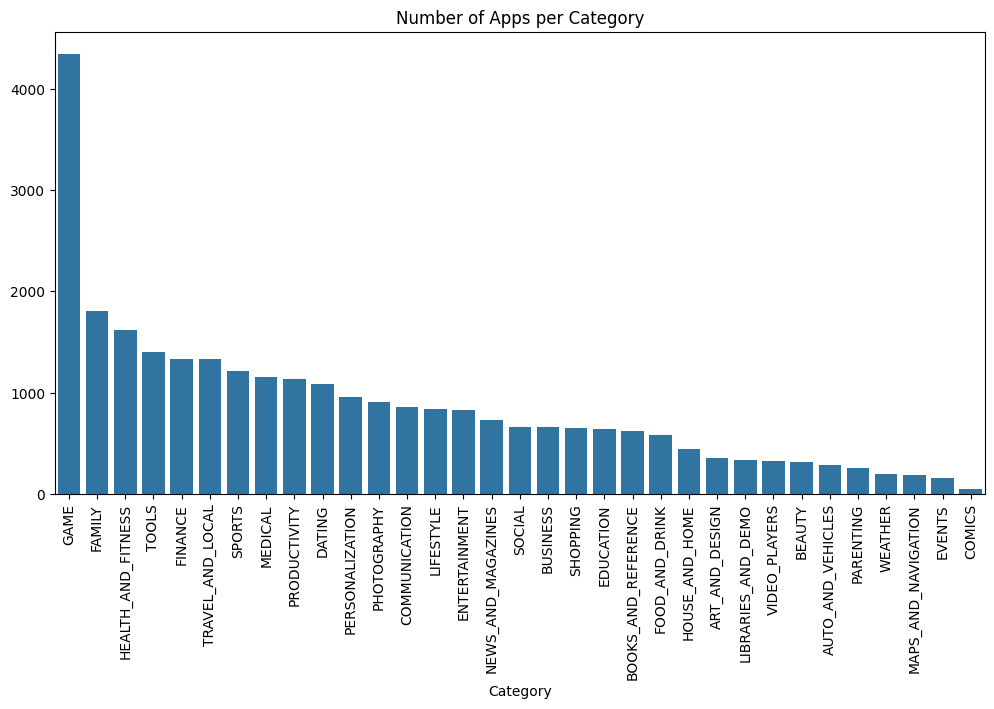

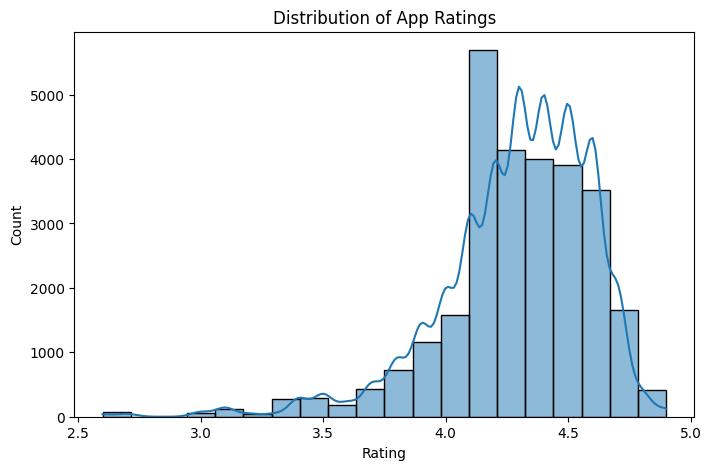

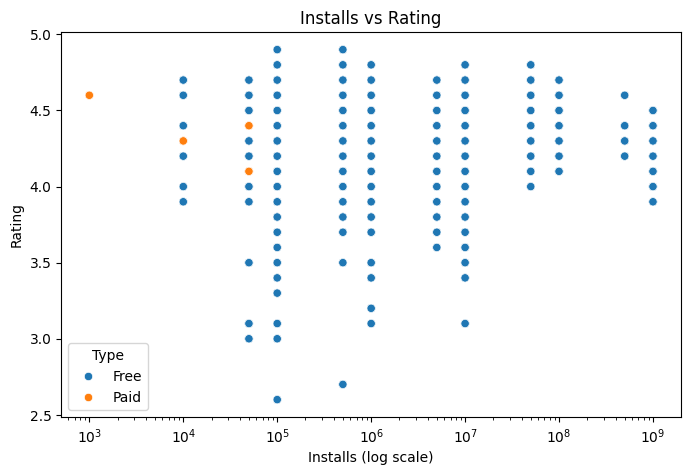

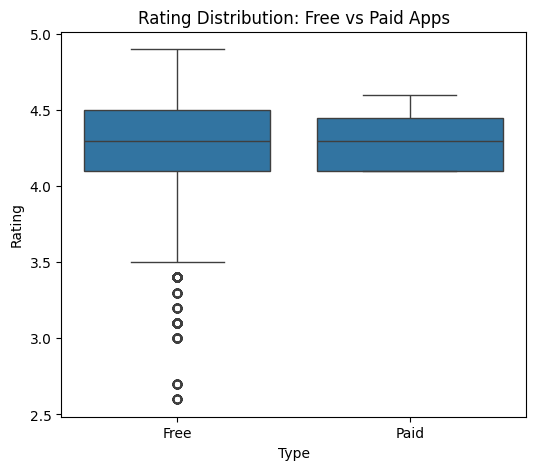

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Bar chart: Apps per Category
# -----------------------------
category_counts = merged['Category'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Apps per Category')
plt.show()

# -----------------------------
# Histogram: Ratings Distribution
# -----------------------------
plt.figure(figsize=(8,5))
sns.histplot(merged['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.show()

# -----------------------------
# Scatter plot: Installs vs Rating
# -----------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x=merged['Installs'], y=merged['Rating'], hue=merged['Type'])
plt.xscale('log')
plt.title('Installs vs Rating')
plt.xlabel('Installs (log scale)')
plt.ylabel('Rating')
plt.show()

# -----------------------------
# Boxplot: Free vs Paid Ratings
# -----------------------------
plt.figure(figsize=(6,5))
sns.boxplot(x='Type', y='Rating', data=merged)
plt.title('Rating Distribution: Free vs Paid Apps')
plt.show()


In [35]:
import plotly.express as px

# category_counts is a Series
category_counts = merged['Category'].value_counts()

# Convert to DataFrame and rename columns
df_counts = category_counts.reset_index()
df_counts.columns = ['Category','Count']

# Now use Plotly
fig = px.bar(df_counts, x='Category', y='Count',
             title='Number of Apps per Category')
fig.show()
